In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [2]:
files = glob.glob("states*.csv")
df_list = []
for filename in files:
  data = pd.read_csv(filename)
  df_list.append(data)

us_census = pd.concat(df_list)
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Rhode Island,1053661,13.356666666666678%,74.32541666666665%,5.68291666666667%,0.3462500000000001%,3.2474999999999983%,0.035833333333333335%,$59125.270833333336,510388M_543273F
1,1,South Carolina,4777576,5.056684981684991%,62.888736263736185%,28.75091575091577%,0.2923992673992673%,1.249175824175822%,0.046978021978021964%,$46296.807763401106,2322409M_2455167F
2,2,South Dakota,843190,3.2396396396396376%,82.50090090090092%,1.4238738738738752%,9.417567567567566%,1.0193693693693688%,0.04189189189189189%,$51805.40540540541,423477M_419713F
3,3,Tennessee,6499615,4.720026972353339%,73.49008766014822%,18.283816587997297%,0.22663519892110592%,1.4072825354012126%,0.04315576534052599%,$47328.083616587355,3167756M_3331859F
4,4,Texas,26538614,38.04673809068304%,44.687908934379145%,11.65004782858236%,0.26114405969007126%,3.6696958102161825%,0.06881576430074614%,$55874.522600500095,13171316M_13367298F


In [3]:
us_census.columns

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')

## Cleaning columns

In [4]:
str_split = us_census.GenderPop.str.split('_')
us_census['Men'] = str_split.str.get(0)
us_census['Women'] = str_split.str.get(1)
us_census.drop(['Unnamed: 0', 'GenderPop'], axis=1, inplace=True)
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Men,Women
0,Rhode Island,1053661,13.356666666666678%,74.32541666666665%,5.68291666666667%,0.3462500000000001%,3.2474999999999983%,0.035833333333333335%,$59125.270833333336,510388M,543273F
1,South Carolina,4777576,5.056684981684991%,62.888736263736185%,28.75091575091577%,0.2923992673992673%,1.249175824175822%,0.046978021978021964%,$46296.807763401106,2322409M,2455167F
2,South Dakota,843190,3.2396396396396376%,82.50090090090092%,1.4238738738738752%,9.417567567567566%,1.0193693693693688%,0.04189189189189189%,$51805.40540540541,423477M,419713F
3,Tennessee,6499615,4.720026972353339%,73.49008766014822%,18.283816587997297%,0.22663519892110592%,1.4072825354012126%,0.04315576534052599%,$47328.083616587355,3167756M,3331859F
4,Texas,26538614,38.04673809068304%,44.687908934379145%,11.65004782858236%,0.26114405969007126%,3.6696958102161825%,0.06881576430074614%,$55874.522600500095,13171316M,13367298F


In [5]:
us_census.columns

Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'Men', 'Women'],
      dtype='object')

## Converting objects to integers or floats

In [6]:
us_census.dtypes

State       object
TotalPop     int64
Hispanic    object
White       object
Black       object
Native      object
Asian       object
Pacific     object
Income      object
Men         object
Women       object
dtype: object

In [7]:
us_census['Hispanic'] = us_census['Hispanic'].replace('[\%]', '', regex=True)
us_census['Hispanic'] = pd.to_numeric(us_census['Hispanic'])

us_census['White'] = us_census['White'].replace('[\%]', '', regex=True)
us_census['White'] = pd.to_numeric(us_census['White'])

us_census['Black'] = us_census['Black'].replace('[\%]', '', regex=True)
us_census['Black'] = pd.to_numeric(us_census['Black'])

us_census['Native'] = us_census['Native'].replace('[\%]', '', regex=True)
us_census['Native'] = pd.to_numeric(us_census['Native'])

us_census['Asian'] = us_census['Asian'].replace('[\%]', '', regex=True)
us_census['Asian'] = pd.to_numeric(us_census['Asian'])

us_census['Pacific'] = us_census['Pacific'].replace('[\%]', '', regex=True)
us_census['Pacific'] = pd.to_numeric(us_census['Pacific'])

us_census['Income'] = us_census['Income'].replace('[\$]', '', regex=True)
us_census['Income'] = pd.to_numeric(us_census['Income'])

us_census['Men'] = us_census['Men'].replace('[M]', '', regex=True)
us_census['Men'] = pd.to_numeric(us_census['Men'])

us_census['Women'] = us_census['Women'].replace('[F]', '', regex=True)
us_census['Women'] = pd.to_numeric(us_census['Women'])

us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Men,Women
0,Rhode Island,1053661,13.356667,74.325417,5.682917,0.346250,3.247500,0.035833,59125.270833,510388,543273.0
1,South Carolina,4777576,5.056685,62.888736,28.750916,0.292399,1.249176,0.046978,46296.807763,2322409,2455167.0
2,South Dakota,843190,3.239640,82.500901,1.423874,9.417568,1.019369,0.041892,51805.405405,423477,419713.0
3,Tennessee,6499615,4.720027,73.490088,18.283817,0.226635,1.407283,0.043156,47328.083617,3167756,3331859.0
4,Texas,26538614,38.046738,44.687909,11.650048,0.261144,3.669696,0.068816,55874.522601,13171316,13367298.0


In [8]:
us_census.dtypes

State        object
TotalPop      int64
Hispanic    float64
White       float64
Black       float64
Native      float64
Asian       float64
Pacific     float64
Income      float64
Men           int64
Women       float64
dtype: object

## Replacing null values

In [9]:
us_census['Women'].isnull().sum()

3

In [10]:
us_census['Women'] = us_census['Women'].fillna(us_census['TotalPop']-us_census['Men'])
us_census['Women'].isnull().sum()

0

In [11]:
us_census['Hispanic'].isnull().sum()

0

In [12]:
us_census['White'].isnull().sum()

0

In [13]:
us_census['Black'].isnull().sum()

0

In [14]:
us_census['Native'].isnull().sum()

0

In [15]:
us_census['Asian'].isnull().sum()

0

In [16]:
us_census['Pacific'].isnull().sum()

5

In [17]:
us_census['Pacific'] = us_census['Pacific'].fillna(100-
                                                   us_census['Hispanic']-
                                                   us_census['White']-
                                                   us_census['Black']-
                                                   us_census['Native']-
                                                   us_census['Asian'])
us_census['Pacific'].isnull().sum()

0

## Deleting duplicates

In [18]:
duplicates = us_census.duplicated()
duplicates.value_counts()

False    51
True      9
dtype: int64

In [19]:
us_census_new = us_census.drop_duplicates()
duplicates = us_census_new.duplicated()
duplicates.value_counts()

False    51
dtype: int64

## Creating histograms from race data

<function matplotlib.pyplot.show(*args, **kw)>

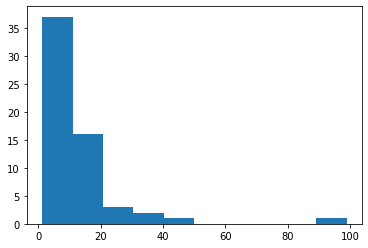

In [20]:
plt.hist(us_census['Hispanic'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

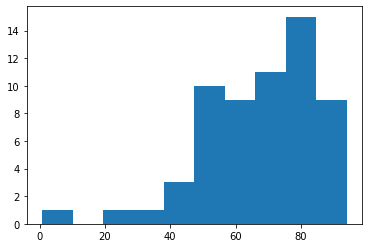

In [21]:
plt.hist(us_census['White'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

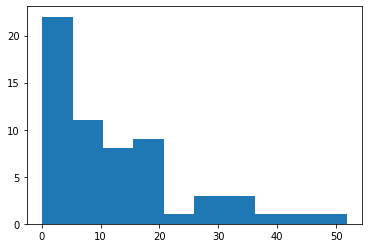

In [22]:
plt.hist(us_census['Black'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

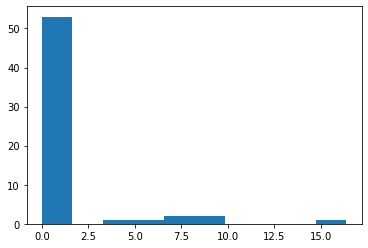

In [23]:
plt.hist(us_census['Native'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

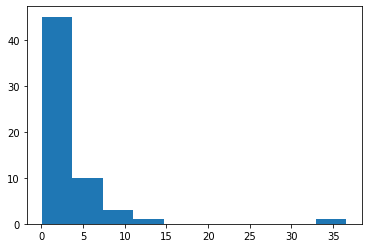

In [24]:
plt.hist(us_census['Asian'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

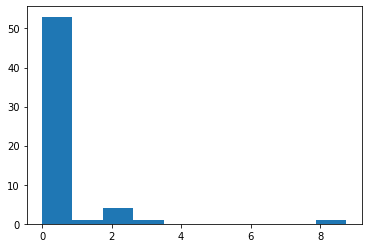

In [25]:
plt.hist(us_census['Pacific'])
plt.show